# Assignment: Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений `n` (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

**Обратите внимание:** для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

* код, генерирующий выборки и графики;
* краткие описания каждого блока кода, объясняющие, что он делает;
* необходимые графики (убедитесь, что на них подписаны оси);
* выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
* выводы по результатам выполнения задания.

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math 
from scipy.optimize import rosen, differential_evolution, minimize
from scipy.stats import poisson
import scipy.stats as stats

### Задача

In [59]:
x_range = np.arange(1, 1000)
gamma = stats.gamma.pdf(x_range, a=5, scale=3)
poisson = stats.poisson.rvs(mu=10, loc=0, size=1000)                        

In [60]:
poisson

array([10, 11, 15,  7,  8, 11, 11, 18,  5,  7, 11,  6, 10,  8, 13,  6,  8,
        7, 17,  9,  8,  9, 12,  8,  5, 11,  8, 12,  7, 10,  6,  9, 12,  7,
        6, 10, 14, 16,  8, 10, 10, 11,  9,  7,  8, 11,  9,  6, 11,  9, 11,
       10,  9, 10, 10, 14, 10, 10,  7,  6,  7,  8,  6, 11, 12, 17,  9,  6,
        9,  6,  7, 11,  3, 10,  9,  9,  7,  3,  8, 13, 12,  6, 14,  7, 12,
       10,  6,  5, 11, 14, 15,  8, 15,  8, 13,  7,  9, 10, 13, 14, 10, 14,
       14,  7, 11, 11, 11,  4, 14, 13, 12, 10, 11, 10, 11, 11,  7, 10, 11,
       10,  7, 10,  6, 16,  7, 13,  8,  8, 10, 10, 11,  6,  5, 10, 10,  7,
        5, 11, 12, 11,  7, 12,  9, 15, 14, 15, 14, 13, 10, 10,  7, 10, 13,
       14, 14, 11,  4, 12,  7,  7, 10,  8, 10,  8,  5, 13,  6,  9,  8, 15,
        9,  8, 12, 15, 16, 10, 10,  8,  5,  7,  5, 12, 11, 10, 12, 10, 16,
       11,  8, 12, 11,  6,  9,  9, 15, 10, 14,  6, 13,  9, 12, 10,  6, 15,
        4, 12, 10, 11, 18, 10, 12, 13, 13,  9,  7,  6,  9,  9, 17, 10,  7,
        4,  6,  7, 12,  6

In [69]:

# plt.plot(poisson)
stats.poisson.pmf(mu=10, loc=0, k=np.linspace(0, 22, 1000))

array([4.53999298e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [71]:
k=np.linspace(0, 22, 1000)
k

array([ 0.        ,  0.02202202,  0.04404404,  0.06606607,  0.08808809,
        0.11011011,  0.13213213,  0.15415415,  0.17617618,  0.1981982 ,
        0.22022022,  0.24224224,  0.26426426,  0.28628629,  0.30830831,
        0.33033033,  0.35235235,  0.37437437,  0.3963964 ,  0.41841842,
        0.44044044,  0.46246246,  0.48448448,  0.50650651,  0.52852853,
        0.55055055,  0.57257257,  0.59459459,  0.61661662,  0.63863864,
        0.66066066,  0.68268268,  0.7047047 ,  0.72672673,  0.74874875,
        0.77077077,  0.79279279,  0.81481481,  0.83683684,  0.85885886,
        0.88088088,  0.9029029 ,  0.92492492,  0.94694695,  0.96896897,
        0.99099099,  1.01301301,  1.03503504,  1.05705706,  1.07907908,
        1.1011011 ,  1.12312312,  1.14514515,  1.16716717,  1.18918919,
        1.21121121,  1.23323323,  1.25525526,  1.27727728,  1.2992993 ,
        1.32132132,  1.34334334,  1.36536537,  1.38738739,  1.40940941,
        1.43143143,  1.45345345,  1.47547548,  1.4974975 ,  1.51

AttributeError: 'poisson_gen' object has no attribute 'pdf'

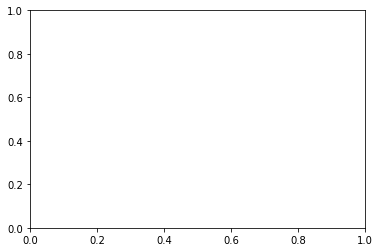

In [75]:
fig, axs = plt.subplots(1, 1)
n_bins = 100
# axs.hist(poisson, bins=n_bins)
axs.plot(stats.poisson.pdf(mu=10, loc=0, k=np.linspace(0, 22, 1000)) )
axs.set_title('sepal length')
# axs[1].hist(data['petal length (cm)'], bins=n_bins)
# axs[1].set_title('petal length')

In [77]:
test_list = []
for i in range(1000):
    test_list.append(stats.poisson.rvs(mu=10, loc=0, size=10).mean())

(array([ 2.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  2.,  2.,  0., 11.,  0.,
         6.,  7.,  0.,  8.,  0.,  7., 13.,  0., 19.,  9.,  0., 15.,  0.,
        32., 24.,  0., 25.,  0., 29., 29.,  0., 31.,  0., 29., 35.,  0.,
        36., 31.,  0., 46.,  0., 37., 40.,  0., 41.,  0., 44., 45.,  0.,
        33.,  0., 36., 25.,  0., 27.,  0., 27., 17.,  0., 21., 23.,  0.,
        18.,  0., 12., 20.,  0., 17.,  0., 10.,  9.,  0., 12.,  0.,  6.,
         2.,  0.,  4.,  5.,  0.,  2.,  0.,  2.,  3.,  0.,  4.,  0.,  2.,
         1.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.]),
 array([ 7.2  ,  7.261,  7.322,  7.383,  7.444,  7.505,  7.566,  7.627,
         7.688,  7.749,  7.81 ,  7.871,  7.932,  7.993,  8.054,  8.115,
         8.176,  8.237,  8.298,  8.359,  8.42 ,  8.481,  8.542,  8.603,
         8.664,  8.725,  8.786,  8.847,  8.908,  8.969,  9.03 ,  9.091,
         9.152,  9.213,  9.274,  9.335,  9.396,  9.457,  9.518,  9.579,
         9.64 ,  9.701,  9.762,  9.823,  9.884,  9.945, 10.006, 10.067,
  

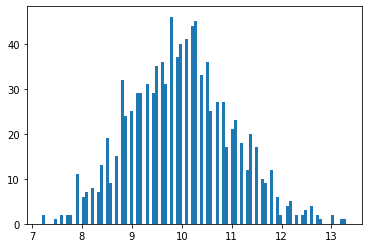

In [79]:
plt.hist(test_list, 100)